Dataset Preview:
  Source  Year    Mean
0   gcag  1850 -0.4177
1   gcag  1851 -0.2333
2   gcag  1852 -0.2294
3   gcag  1853 -0.2704
4   gcag  1854 -0.2915

Missing Values:
Source    0
Year      0
Mean      0
dtype: int64


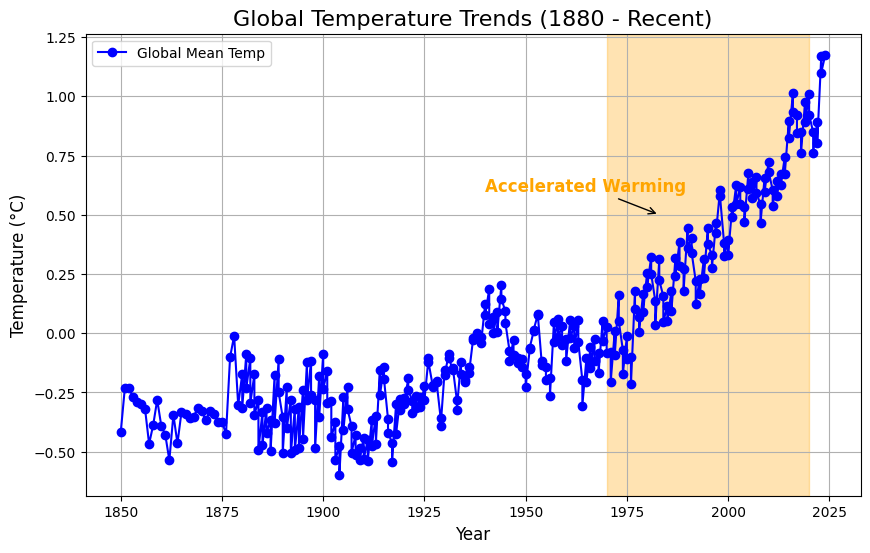

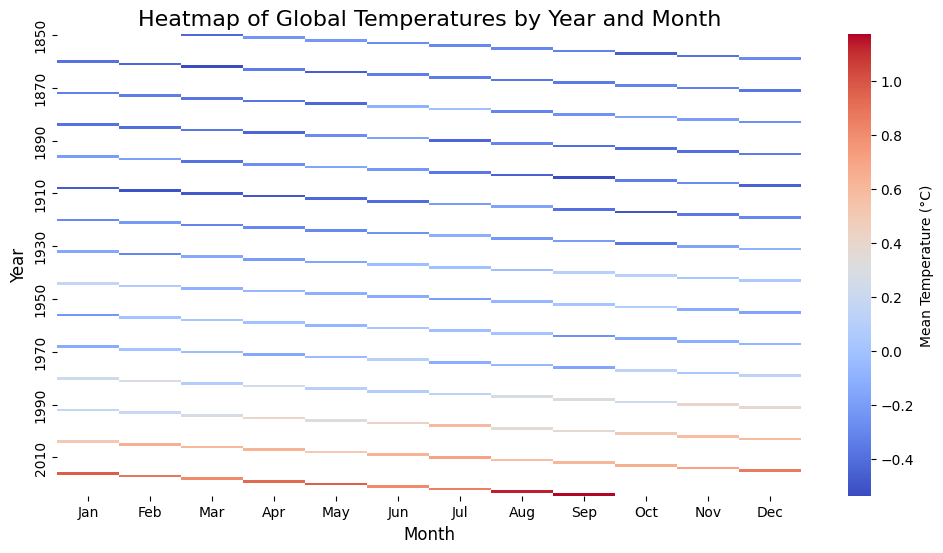


Basic Insights:
- Dataset starts from 1850 and ends at 2024.
- Identify periods with steep temperature changes (visualizations).


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load the dataset
# Replace 'path_to_file.csv' with the actual path to your dataset
url = "https://datahub.io/core/global-temp/r/annual.csv"
data = pd.read_csv(url)

# Display first few rows
print("Dataset Preview:")
print(data.head())

# Step 2: Data Cleaning
# Check for missing values
print("\nMissing Values:");
print(data.isnull().sum())

# Rename columns for easier access
data.rename(columns={"Year": "year", "Mean": "global_mean_temp"}, inplace=True)

# Step 3: Exploratory Data Analysis (EDA)
# Plotting global temperature trends
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['global_mean_temp'], color='b', marker='o', label='Global Mean Temp')
plt.title('Global Temperature Trends (1880 - Recent)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid()
plt.axvspan(1970, 2020, color='orange', alpha=0.3) 
plt.annotate('Accelerated Warming', 
             xy=(1983, 0.50),  # Adjust the xy to place the annotation where you want
             xytext=(1940, 0.60),  # Adjust the position of the text
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12, color='orange', weight='bold')
plt.show()

# Step 4: Heatmap of Monthly Trends

data['month'] = (data['year'] % 12) + 1
pivot_data = data.pivot_table(values='global_mean_temp', index='year', columns='month')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='coolwarm',
    cbar_kws={'label': 'Mean Temperature (°C)'},
    xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    yticklabels=20, annot=False)

plt.title('Heatmap of Global Temperatures by Year and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

# Step 5: Interactive Visualization using Plotly
fig = px.line(data, x='year', y='global_mean_temp', 
              title='Interactive Global Temperature Trends',
              labels={'year': 'Year', 'global_mean_temp': 'Global Mean Temp (°C)'})
fig.update_traces(line=dict(color='firebrick', width=2))
fig.show()

# Step 6: Insights
print("\nBasic Insights:")
print(f"- Dataset starts from {data['year'].min()} and ends at {data['year'].max()}.")
print("- Identify periods with steep temperature changes (visualizations).")
